In [11]:
import numpy as np
import glob
import os, sys
protomshome = os.environ["PROTOMSHOME"]
sys.path.append(protomshome +"/tools")
from simulationobjects import ResultsFile
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.display import Image

# GCMC statistics for ideal gas
A test to ensure that `ProtoMS` correctly samples the grand canonical ensemble by using insertion probabilities of ideal gas as a test case.

In [23]:
directories = ['out2','out1','out0','out-1','out-2','out-3','out-4']
skip = 200
N_inst = []
N_mean = []
B = []

for dirs in directories:
    folders =  glob.glob(dirs)
    if len(folders)==0:
        print "\nError. No folder(s) matching '%s'. Exiting program.\n" % directories
        break
    for folder in folders:
        results = ResultsFile()
        resultsfiles = glob.glob(folder+ "/"+'results'+"*")
        if len(resultsfiles) > 1: # It is assumed the results are from ProtoMS 2.
            results.read([folder,'results'])
        elif len(resultsfiles)==1: # It is assumed the results are from ProtoMS 3.
            results.read(folder+ "/"+'results')
        else:
            print "\nError. No results file matching %s. Exiting program\n" % folder+"/"+'results'
            break
        solventson = np.array([snap.solventson for snap in results.snapshots])# Counting how many molecules have been inserted.
        N_inst.append(solventson)
        mean_on = np.mean(solventson[skip:solventson.size])
        N_mean.append(mean_on)
        adams = np.array([snap.bvalue for snap in results.snapshots])# Recording the B-value for each window (should be constant, but averaging just in case).
        mean_adams = np.mean(adams[(skip-1):adams.size])
        B.append(mean_adams)
print "\n...GCMC data has been read."

  # Checking to make sure the data makes sense.
N_mean = np.array(N_mean)
B = np.array(B)


...GCMC data has been read.


In [24]:
N_mean

array([ 34.4047619 ,  21.63666667,  13.49333333,   8.15333333,
         5.16      ,   2.84666667,   1.66      ])

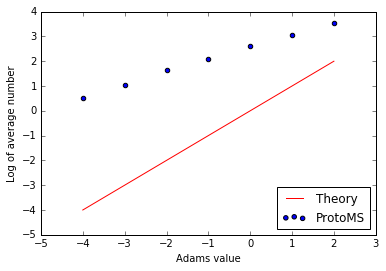

In [40]:
plt.scatter(B,np.log(N_mean))
plt.plot(B,B,color='red')
plt.xlabel('Adams value')
plt.ylabel('Log of average number')
plt.legend(('Theory','ProtoMS'),loc=4)
plt.show()

In [29]:
np.log(N_mean)

array([ 3.53819498,  3.07438941,  2.60219574,  2.09842684,  1.64093658,
        1.04614872,  0.5068176 ])